<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/w12_text_data_analysis_yleekim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 뉴스 카테고리 분류

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(X_train.shape, '학습용 뉴스 기사')
print(X_test.shape, '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
(8982,) 학습용 뉴스 기사
(2246,) 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


## LSTM으로 분류하기

In [2]:
# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 44s 76ms/step - loss: 2.2392 - accuracy: 0.4284 - val_loss: 1.9032 - val_accuracy: 0.5045
Epoch 2/200
450/450 [==============================] - 8s 17ms/step - loss: 1.7995 - accuracy: 0.5451 - val_loss: 1.7310 - val_accuracy: 0.5641
Epoch 3/200
450/450 [==============================] - 5s 12ms/step - loss: 1.6708 - accuracy: 0.5660 - val_loss: 1.6176 - val_accuracy: 0.5899
Epoch 4/200
450/450 [==============================] - 6s 13ms/step - loss: 1.5190 - accuracy: 0.6082 - val_loss: 1.4954 - val_accuracy: 0.6300
Epoch 5/200
450/450 [==============================] - 5s 10ms/step - loss: 1.3641 - accuracy: 0.6479 - val_loss: 1.3476 - val_accuracy: 0.6576
Epoch 6/200
450/450 [==============================] - 5s 11ms/step - loss: 1.2273 - accuracy: 0.6896 - val_loss: 1.3061 - val_accuracy: 0.6621
Epoch 7/200
450/450 [==============================] - 4s 10ms/step - loss: 1.1246 - accuracy: 0.7134 - val_loss: 1.2180 - val_accuracy

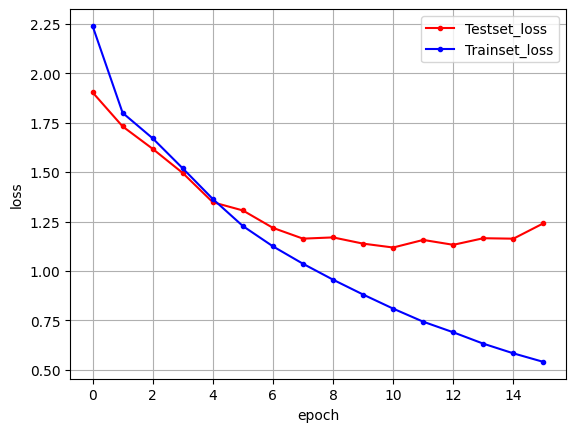

In [4]:
# 학습셋과 테스트셋의 오차를 저장합니다.
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))  # 리스트의 길이를 구하는 방법은 len() 함수를 사용합니다.
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [6]:
#분류결과 확인하기
# 예측 결과를 얻습니다.
y_pred = model.predict(X_test)  # x_test는 테스트 데이터입니다.

# 각 예측 결과에서 가장 높은 확률을 가지는 클래스(카테고리)를 선택합니다.
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 카테고리 데이터 출력
print(predicted_categories)


71/71 [==============================] - 1s 4ms/step
[3, 10, 11, 16, 13, 3, 3, 3, 3, 3, 1, 4, 1, 3, 2, 34, 4, 3, 19, 3, 8, 3, 3, 3, 9, 3, 4, 6, 24, 3, 3, 10, 4, 3, 19, 4, 19, 1, 4, 3, 2, 19, 3, 8, 4, 4, 3, 4, 3, 11, 20, 16, 20, 3, 3, 4, 2, 4, 20, 19, 3, 3, 4, 4, 4, 3, 3, 1, 3, 4, 21, 16, 3, 19, 18, 24, 1, 3, 16, 4, 3, 3, 3, 2, 19, 20, 1, 11, 13, 3, 3, 4, 3, 8, 3, 11, 30, 3, 16, 1, 13, 3, 3, 3, 3, 2, 4, 13, 4, 4, 19, 3, 3, 3, 16, 4, 4, 4, 3, 4, 3, 4, 19, 4, 18, 3, 19, 3, 24, 3, 8, 3, 1, 3, 1, 4, 1, 1, 3, 3, 3, 3, 4, 4, 20, 2, 4, 1, 3, 3, 3, 4, 3, 3, 4, 1, 3, 3, 11, 17, 3, 4, 2, 4, 3, 4, 3, 10, 3, 3, 3, 20, 3, 19, 3, 21, 4, 17, 3, 3, 3, 8, 3, 8, 3, 30, 3, 3, 6, 18, 20, 3, 11, 36, 8, 1, 3, 4, 4, 4, 25, 16, 19, 3, 3, 4, 4, 19, 16, 3, 3, 4, 3, 3, 3, 20, 4, 16, 3, 3, 3, 3, 3, 4, 13, 3, 45, 16, 25, 3, 4, 20, 3, 11, 9, 1, 3, 3, 11, 11, 19, 1, 4, 4, 11, 3, 3, 4, 19, 3, 4, 4, 3, 3, 25, 4, 3, 4, 32, 11, 8, 4, 4, 4, 21, 3, 4, 4, 3, 3, 3, 19, 3, 8, 20, 3, 4, 19, 19, 3, 13, 4, 16, 4, 3, 3, 3, 3, 4, 

In [7]:
# 카테고리 데이터의 숫자를 해당 텍스트로 변환하는 함수
def numerical_to_text_category(numerical_category):
    if numerical_category == 0:
        return "negative"
    elif numerical_category == 1:
        return "positive"
    else:
        return "unknown"  # 예외 처리: 0 또는 1 이외의 값은 "unknown"으로 처리

# 모델의 예측 결과 (numerical_category)를 해당 텍스트로 변환
predicted_text_categories = [numerical_to_text_category(category) for category in predicted_categories]

# 결과 출력
print(predicted_text_categories)


['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'positive', 'unknown', 'positive', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'positive', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'positive', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'positive', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'positive', 'unknown', 'unknown', 'unknown', 'un

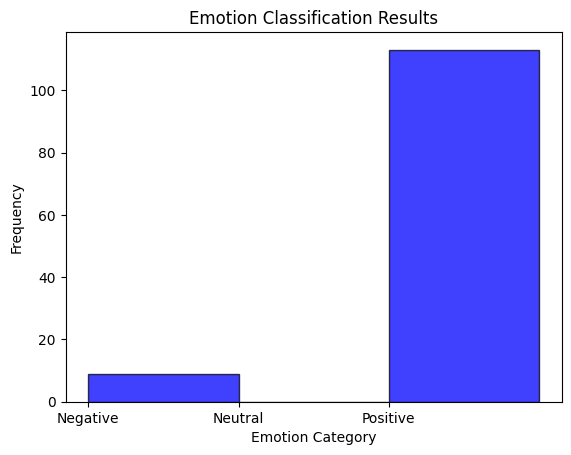

In [8]:
import matplotlib.pyplot as plt

# 모델의 예측 결과 (numerical_category)를 히스토그램으로 표시
plt.hist(predicted_categories, bins=[0, 0.5, 1, 1.5], align='mid', alpha=0.75, color='blue', edgecolor='black')

# 히스토그램 레이블 및 제목 설정
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')
plt.xticks([0, 0.5, 1], ['Negative', 'Neutral', 'Positive'])
plt.title('Emotion Classification Results')

# 히스토그램 표시
plt.show()


##LSTM에 CNN 더하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 64)          0         
 D)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 

In [11]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history1 = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 70s 143ms/step - loss: 0.3642 - accuracy: 0.8385 - val_loss: 0.3005 - val_accuracy: 0.8749
Epoch 2/100
469/469 [==============================] - 27s 58ms/step - loss: 0.2297 - accuracy: 0.9117 - val_loss: 0.3254 - val_accuracy: 0.8717
Epoch 3/100
469/469 [==============================] - 16s 35ms/step - loss: 0.1883 - accuracy: 0.9283 - val_loss: 0.2721 - val_accuracy: 0.8918
Epoch 4/100
469/469 [==============================] - 13s 27ms/step - loss: 0.1542 - accuracy: 0.9442 - val_loss: 0.2836 - val_accuracy: 0.8920
Epoch 5/100
469/469 [==============================] - 13s 28ms/step - loss: 0.1259 - accuracy: 0.9543 - val_loss: 0.3077 - val_accuracy: 0.8894
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.3794 - accuracy: 0.8752

 Test Accuracy: 0.8752


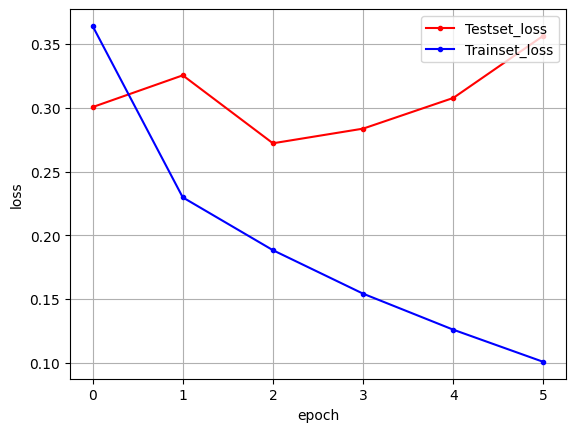

In [12]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history1.history['val_loss']
y_loss = history1.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
#분류결과 확인하기
# 예측 결과를 얻습니다.
y_pred = model.predict(X_test)  # x_test는 테스트 데이터입니다.

# 각 예측 결과에서 가장 높은 확률을 가지는 클래스(카테고리)를 선택합니다.
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 카테고리 데이터 출력
print(predicted_categories)


782/782 [==============================] - 5s 5ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
#분류결과 확인하기
# 예측 결과를 얻습니다.
y_pred = model.predict(X_test)  # x_test는 테스트 데이터입니다.

# 각 예측 결과에서 가장 높은 확률을 가지는 클래스(카테고리)를 선택합니다.
predicted_categories = [np.argmax(pred) for pred in y_pred]

# 카테고리 데이터 출력
print(predicted_categories)


782/782 [==============================] - 3s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# 카테고리 데이터의 숫자를 해당 텍스트로 변환하는 함수
def numerical_to_text_category(numerical_category):
    if numerical_category == 0:
        return "negative"
    elif numerical_category == 1:
        return "positive"
    else:
        return "unknown"  # 예외 처리: 0 또는 1 이외의 값은 "unknown"으로 처리

# 모델의 예측 결과 (numerical_category)를 해당 텍스트로 변환
predicted_text_categories = [numerical_to_text_category(category) for category in predicted_categories]

# 결과 출력
print(predicted_text_categories)


['negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'ne

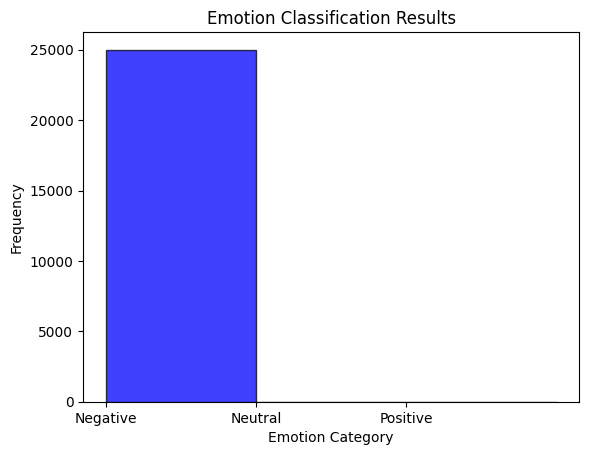

In [16]:
import matplotlib.pyplot as plt

# 모델의 예측 결과 (numerical_category)를 히스토그램으로 표시
plt.hist(predicted_categories, bins=[0, 0.5, 1, 1.5], align='mid', alpha=0.75, color='blue', edgecolor='black')

# 히스토그램 레이블 및 제목 설정
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')
plt.xticks([0, 0.5, 1], ['Negative', 'Neutral', 'Positive'])
plt.title('Emotion Classification Results')

# 히스토그램 표시
plt.show()


# 워드클라우드로 시각화 하기

In [29]:
from keras.datasets import imdb

# IMDB 데이터셋 로드
(X_train_org, y_train_org), (X_test_org, y_test_org) = imdb.load_data(num_words=1000)

# 원본 단어 사전 로드
word_index = imdb.get_word_index()

# 숫자를 원래의 단어로 변환하는 함수 정의
def decode_review(review):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = [reverse_word_index.get(i - 3, '?') for i in review]
    return decoded_review

# 훈련 데이터와 테스트 데이터의 첫 번째 샘플을 변환하여 출력
#  변환하는데 시간이 너무오래 걸려 숫자를 줄임
decoded_review_train = [decode_review(review) for review in X_train_org[:5]]
decoded_review_test = [decode_review(review) for review in X_test_org[:5]]


print("훈련 데이터 첫 번째 샘플:")
print(decoded_review_train[0])
print("\n테스트 데이터 첫 번째 샘플:")
print(decoded_review_test[0])


훈련 데이터 첫 번째 샘플:
['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', '?', '?', 'story', 'direction', '?', 'really', '?', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', '?', '?', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', '?', 'with', 'this', 'film', 'the', '?', '?', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', '?', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', '?', '?', 'was', 'amazing', 'really', '?', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', '?', 'at', 'a', 'film', 'it', 'must', 'have', 'been', 'good', 'and', 'this', 'definite

In [30]:
import pandas as pd
from tensorflow.keras.datasets import imdb

# 데이터 프레임 생성
df_train = pd.DataFrame({'review': decoded_review_train, 'sentiment': y_train[:5]})
df_test = pd.DataFrame({'review': decoded_review_test, 'sentiment': y_test[:5]})

# CSV 파일로 저장
df_train.to_csv('imdb_train.csv', index=False)
df_test.to_csv('imdb_test.csv', index=False)


In [31]:
import pandas as pd

# 저장한 CSV 파일 불러오기
df_train = pd.read_csv('imdb_train.csv')
df_test = pd.read_csv('imdb_test.csv')

# 훈련 데이터의 처음 몇 개 샘플 출력
print("훈련 데이터 예시:")
print(df_train.head())

# 테스트 데이터의 처음 몇 개 샘플 출력
print("\n테스트 데이터 예시:")
print(df_test.head())


훈련 데이터 예시:
                                              review  sentiment
0  ['?', 'this', 'film', 'was', 'just', 'brillian...          1
1  ['?', 'big', '?', 'big', '?', 'bad', 'music', ...          0
2  ['?', 'this', 'has', 'to', 'be', 'one', 'of', ...          0
3  ['?', 'the', '?', '?', 'at', '?', 'the', '?', ...          1
4  ['?', 'worst', '?', 'of', 'my', 'life', 'br', ...          0

테스트 데이터 예시:
                                              review  sentiment
0  ['?', 'please', 'give', 'this', 'one', 'a', 'm...          0
1  ['?', 'this', 'film', '?', 'a', 'lot', 'of', '...          1
2  ['?', 'many', 'animation', '?', '?', '?', '?',...          1
3  ['?', 'i', '?', 'love', 'this', 'type', 'of', ...          0
4  ['?', 'like', 'some', 'other', 'people', '?', ...          1


In [33]:
#워드 클라우드로 확인하기
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 저장한 CSV 파일 불러오기
df_train = pd.read_csv('imdb_train.csv')
df_test = pd.read_csv('imdb_test.csv')

# 훈련 데이터와 테스트 데이터 합치기
df_combined = pd.concat([df_train, df_test])

# 합친 데이터프레임에서 리뷰 텍스트 추출
reviews = df_combined['review'].values



In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK에서 불용어 다운로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 불용어 정의
stop_words = set(stopwords.words('english'))
stop_words.update(['br', "'", 's', 'n'])

# 불용어 제거 및 텍스트 토큰화
filtered_reviews = []
for review in reviews:
    word_tokens = word_tokenize(review)
    filtered_review = [word for word in word_tokens if word.lower() not in stop_words]
    filtered_reviews.append(' '.join(filtered_review))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


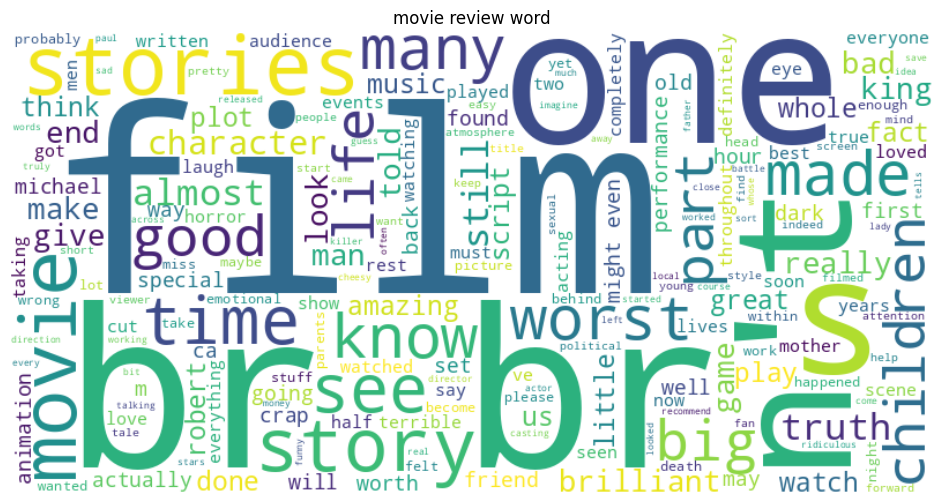

In [41]:
# 워드클라우드 생성
filtered_text = ' '.join(filtered_reviews)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(filtered_text)

# 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('movie review word')
plt.axis("off")

plt.show()

## 네트워크X 그래프 생성

In [65]:
import pandas as pd
import networkx as nx
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# 저장한 CSV 파일 불러오기
df_train = pd.read_csv('imdb_train.csv')
df_test = pd.read_csv('imdb_test.csv')

# 훈련 데이터와 테스트 데이터 합치기
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# 'review' 열에서 텍스트 데이터 추출
text_data = df_combined['review'].tolist()

# 텍스트 데이터 전처리 (예: 불용어 제거 등)
# 불용어 목록 로드
stop_words = set(stopwords.words('english'))
# 전치사와 추가할 불용어 목록
additional_stop_words = set(["is", "in", "of", "his", "was", "at", "to", "as", "for", "an", "its", "on", "in",
                             "the", "and", "to", "this", "it", "that"])
# 불용어 목록에 추가
stop_words.update(additional_stop_words)

# 텍스트 데이터 전처리 (불용어 제거 등)
tokens = []
for text in text_data:
    # 텍스트를 소문자로 변환
    text = text.lower()
    # 토큰화
    words = word_tokenize(text)
    # 불용어 제거 및 단어 길이가 1 이상인 단어만 선택
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
    tokens.extend(filtered_words)


# NetworkX 그래프 생성
G = nx.Graph()

# 토큰 카운트
token_counts = Counter(tokens)

# 네트워크에 노드 추가 (단어)
for token, count in token_counts.items():
  if token not in stop_words:
    G.add_node(token, count=count)

# 단어 간의 관계를 엣지로 추가
for i in range(len(tokens) - 1):
    word1, word2 = tokens[i], tokens[i + 1]
    if not G.has_edge(word1, word2):
        G.add_edge(word1, word2, weight=1)
    else:
        G[word1][word2]['weight'] += 1

# 네트워크 분석 또는 시각화 등 추가 작업 수행 가능


불용어를 제거해도 네트워크 내에서 연결성이 높은 다른 단어들에 의해 Centrality에서 상위에 나올 수 있습니다. 이는 네트워크 구조와 각 단어의 사용 빈도에 따라 결정되기 때문.

In [67]:
# 네트워크 지표 계산
print("Number of nodes (words):", len(G.nodes()))
print("Number of edges (connections between words):", len(G.edges()))

# Degree Centrality 계산
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality (Top 10 words):")
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for word, centrality in sorted_degree_centrality[:10]:
    print(f"{word}: {centrality:.4f}")


Number of nodes (words): 460
Number of edges (connections between words): 1460

Degree Centrality (Top 10 words):
'the: 0.3268
'and: 0.1983
'of: 0.1656
'to: 0.1525
'is: 0.1394
'this: 0.1242
'in: 0.1176
'it: 0.1068
'that: 0.1046
'was: 0.0828


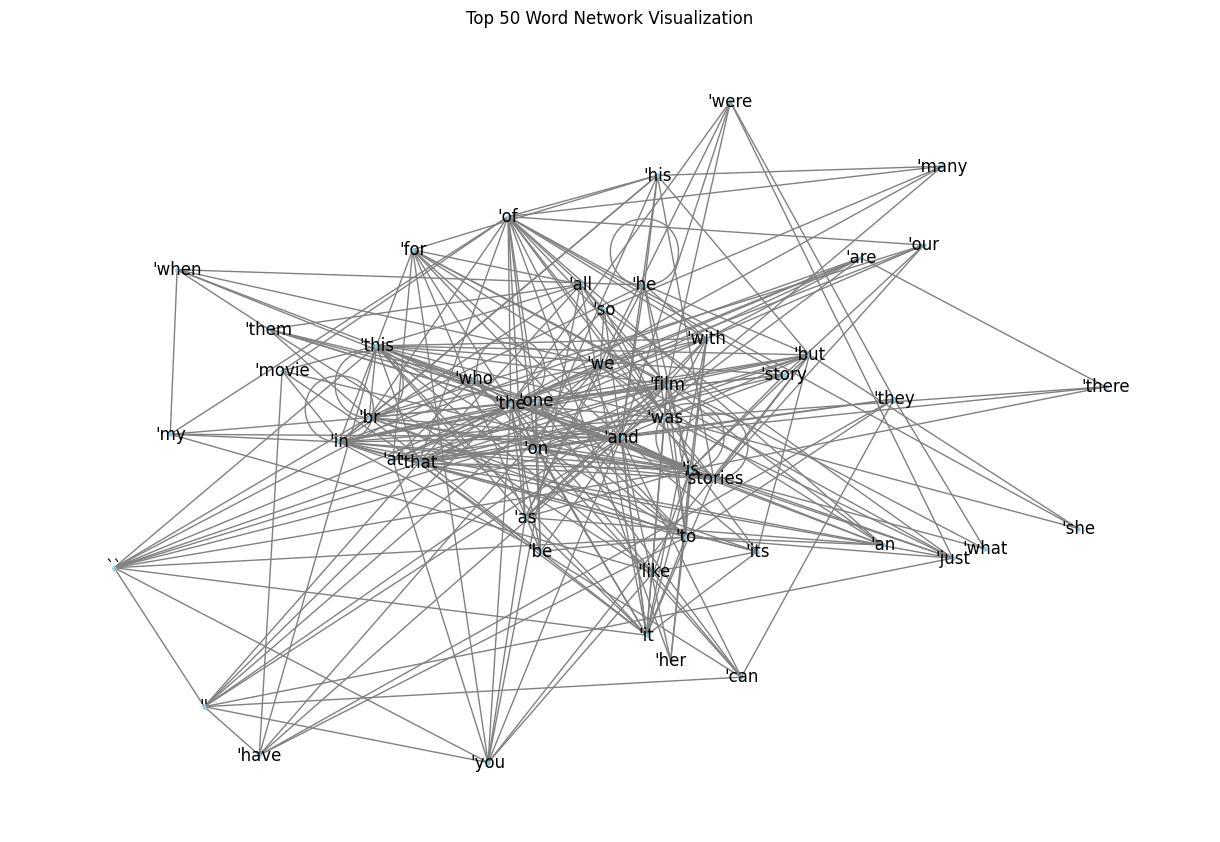

In [68]:
import matplotlib.pyplot as plt

# 그래프 시각화
pos = nx.spring_layout(G, k=0.2)  # 그래프 레이아웃 설정
plt.figure(figsize=(12, 8))

# 상위 50개의 노드만 선택
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_nodes = [node[0] for node in top_nodes]

# 상위 50개 노드만 그래프에 표시 (노드 레이블 추가)
subgraph = G.subgraph(top_nodes)
labels = {node: node for node in top_nodes}  # 노드 레이블 설정
nx.draw(subgraph, pos, node_size=5, node_color='skyblue', edge_color='gray', labels=labels)
plt.title('Top 50 Word Network Visualization')
plt.show()

